# Poisson Processes

Below I give a simple example to get you started with Pandas.

In [2]:
# initial imports and setup
%matplotlib inline
# import pandas as pd
import scipy.constants
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
import scipy as sp
from scipy.optimize import minimize
from matplotlib.patches import Ellipse
import scipy.interpolate as interpolate

**0.1 Poisson Processes**

**a)** If p$\Delta t$ is the probability that someone arrives within the small time interval
$\Delta t$, then what is the probability that no one arrives within this small time
interval?

$P(0,t_0 + \Delta t, t_0) = 1 - p \Delta t $

**b)** Express the probability $P(n; t+\Delta t; t_0)$ in terms of probabilities $P(n - 1; t; t_0)$ and $P(n; t; t_0)$.

$$
P(n; t+\Delta t; t_0) = p\Delta t P(n - 1; t; t_0) + (1 - p\Delta t ) P(n; t; t_0)
$$

**c)** Derive from this expression the differential equation

$$ 
\frac{\partial}{\partial t} P(n; t; t_0) = -pP(n; t; t_0) + pP(n - 1; t; t_0)
$$

from **b)**

$$
P(n; t+\Delta t; t_0) - P(n; t; t_0) = p\Delta t P(n - 1; t; t_0) - p\Delta t P(n; t; t_0)
$$

so

$$
\frac{1}{\Delta t} \left[ P(n; t+\Delta t; t_0) - P(n; t; t_0) \right] = p P(n - 1; t; t_0) - p P(n; t; t_0)
$$

with $\lim_{\Delta t \rightarrow 0}$

$$
\frac{1}{\Delta t} \left[ P(n; t+\Delta t; t_0) - P(n; t; t_0) \right] = \frac{\partial}{\partial t} P(n; t; t_0)
$$

so

$$
\frac{\partial}{\partial t} P(n; t; t_0) = - p P(n; t; t_0) + p P(n - 1; t; t_0)
$$

**d)** Now also express the probability $P(0; t+\Delta t; t_0)$ of having no visitors in
terms of probabilities at time t, and derive from this the differential equation
$$
\frac{\partial}{\partial t} P(0; t; t_0) = -p P(0; t; t_0)
$$

the probability of zero guest at $t + \Delta t$ is given by

$$
\begin{aligned}
P(0,t + \Delta t, t_0) &= (1 - p\Delta t)^{\frac{t + \Delta t}{ \Delta t }}\\
&= (1 - p\Delta t)^{\frac{t}{ \Delta t }}(1 - \Delta t) \\
& = (1 - p\Delta t)^{\frac{t}{ \Delta t }} - \Delta t(1 - p\Delta t)^{\frac{t}{ \Delta t }}\\
&= P(0,t, t_0) - p\Delta  P(0,t, t_0) 
\end{aligned}
$$

rearranging this

$$
\frac{1}{\Delta t} \left[P(0,t + \Delta t, t_0) - P(0,t,t_0)\right] = -p P(0,t,t_0)
$$

with $\lim_{\Delta t \rightarrow 0}$

$$
\frac{1}{\Delta t} \left[P(0,t + \Delta t, t_0) - P(0,t,t_0)\right] = \frac{\partial}{\partial t} P(0; t; t_0)
$$

so

$$
\frac{\partial}{\partial t} P(0; t; t_0) = -p P(0,t,t_0)
$$


**e)** Use the ansatz $P(n; t; t_0) = A_{n}(t)\exp{(p(t-t_0))}$ to derive that
$$
P(n; t; t_0) = \frac{(p(t - t_0))^{n}}{n!} \exp{(p(t-t_0))}
$$
are the solutions for the differential equations 1 and 2 that agree with the
initial conditions.

For simplicity we start with $P(n,T)$ as the probability of n guests at time $T$ after $t_0 = 0$ so $T=t-t_0$

from $(2)$

$$
\frac{\partial}{\partial T} P(0,T) = -p P(0,T)
$$

so

$$
\int \frac{1}{P(0,T)}\frac{\partial}{\partial T} P(0,T) \partial T = \int -p \partial T
$$

$$
\Rightarrow \log{(P(0,T))} = -pT + C_0
$$

at $T=0$ (ie $t=t_0$), $P(0,0) = 1$ $\Rightarrow$ $C_0 = 0$ so $P(0,T) = \exp{(-p T)}$

from $(1)$

$$
\frac{\partial}{\partial T} P(1,T) = p P(0,T) - p P(1,T)
$$

using $P(0,T) = \exp{(-p T)}$

$$
\frac{\partial}{\partial T} P(1,T) - p P(1,T) = p \exp{(-p T)}
$$

$$
\frac{\partial}{\partial T} \left[\exp{(p T)} P(1,T) \right] = p
$$

$$
\exp{(p T)} P(1,T) = p T + C_1
$$

again, from the initial, we see $C_1 = 0$ so

$$
P(1,T) = p T \exp{(- p T)}
$$

similarly
$$
P(2,T) = \frac{(pT)^{2}}{2!} \exp{(-p T)} \\
P(3,T) = \frac{(p T)^{3}}{3!} \exp{(-p T)}\\
\vdots \\
P(n,T) = \frac{(p T)^{n}}{n!} \exp{(-p T)}
$$

substituting back for $T$ we have
$$
P(n,t, t_0) = \frac{(p (t-t_0))^{n}}{n!} \exp{(-p (t-t_0))}
$$

**f)** Derive from equation 3 the average/expected number of visitors coming
to your party between time $t_0$ and $t$.

Using the taylor expansion of the exponential function for an arbitrary variable

$$
\begin{aligned}
\mathbb{E}[n] &= \sum_{n=0}^{\infty} n P(n,t,t_0) \\
& = \exp{(-p(t-t_0))} \sum_{n=1}^{\infty} \frac{(p (t-t_0))^{n}}{n!}\\
& = (p (t-t_0))\exp{(-p(t-t_0))} \sum_{n=1}^{\infty} \frac{(p (t-t_0))^{n-1}}{n!}\\
& = (p (t-t_0))\exp{(-p(t-t_0))} \exp{(p(t-t_0))}\\
& = p (t-t_0)\\
\end{aligned}$$

**g)** Derive from equation 3 the most likely number of visitors coming to your
party, i.e. the number n where $P(n; t; t_0) > P(n-1; t; t_0)$ and $P(n; t; t_0) >
P(n + 1; t; t_0)$.

This value is given by the nearest integer to the expected value so $\lceil p(t-t_0)\rceil - 1$ or $\lfloor p(t-t_0)\rfloor$

**h)** Divide a period of 60 minutes into steps of t = 1 minute. For each
step determine randomly if someone arrives according to probability pt
and count the number of visitors after 60 minutes. Repeat this procedure
10000 times and plot the distribution of visitors after 60 minutes in a
histogram.

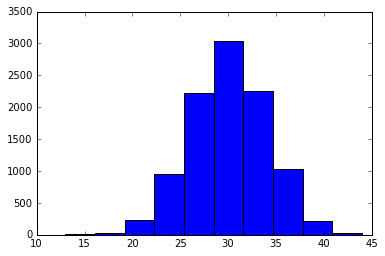

In [3]:
p = 0.5
tstep = 60 #seconds time step
tmax = 3600 #seconds time max

def simulateUniform(tstep, tmax, p, n):
    all_ns = np.random.rand(n,int(tmax/tstep))
    all_ns = all_ns - (1-(tstep/60)*p)
    all_ns = np.ceil(all_ns)
    ns = np.sum(all_ns, axis=1)
    plt.hist(ns, bins=10)
    plt.show()

    
simulateUniform(tstep,tmax,p,10000)

            
    

**i)** Now divide the period of 60 minutes into steps of t = 1 second and
plot the distribution again. Also draw the Poisson distribution that you
expect. Why are the two simulated distributions not the same? Which
one is more accurate? And why?

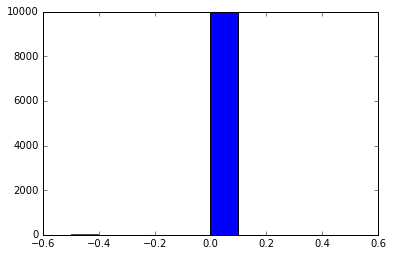

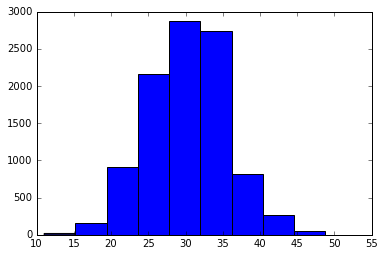

In [4]:
tstep = 1
simulateUniform(tstep,tmax,p,10000)

samples = np.random.poisson(p*(tmax/60),10000)
plt.hist(samples,bins=10)
plt.show()


The difference between the distributions can be explained by the fact that the first is a uniform distribution and the second is a Poisson distribution. ACCURATE WRT TO WHAT?

**j)** Show that the probability for getting the nth visitor at time t is

$$
dtP (t; n; t_{0}) = dt\frac{p(p(t - t_{0}))^{n-1} }{(n - 1)!}e^{-p(t-t_{0})}
$$

Here $dt$ is the expression for $\Delta$t as it becomes infinitesimally small.

Given $T = t - t_0$ then

$$
P(n|T) = \frac{(pT)^n}{n!}\exp{(-pT)}
$$

then the probability of the $n^{th}$ guest at time t given n-1 already present as the $n^{th}$ arrives at T is given by

$$
P(n|T) = p\Delta t P(n-1|T)
$$

from Bayes' rule $P(T|n) = P(n|T)P(T)$ where $P(T) \propto \Delta t$ then the above is proportional to

$$
\Delta t P(T|n) = p\Delta t P(n-1|T)
$$

which is 


$$
dtP (t; n; t_{0}) = dt\frac{p(p(t - t_{0}))^{n-1} }{(n - 1)!}e^{-p(t-t_{0})}
$$

as $\Delta t$ becomes infinitesimally small

**k)** What is the average time it takes for the first visitor to arrive (derive this).

With $T=t-t_0$

$$
\begin{aligned}
\mathbb{E}[P(T|1)] &= \int_{0}^{\infty} T p \exp{(-pT)} \\
&= \left[-\frac{(pT + 1)}{p}\exp{(-pT)}\right]_{0}^{\infty}\\
&= \left[-\frac{(pT + 1)}{p}\exp{(-pT)}\right]^{\infty} - \left[-\frac{(pT + 1)}{p}\exp{(-pT)}\right]_{0}\\
\end{aligned}
$$

as $\exp{(-pT)} \rightarrow 0$ faster than $(pT + 1) \rightarrow \infty$ as $T \rightarrow \infty$, this integral resolves to

$$
\begin{aligned}
\mathbb{E}[P(T|1)] &=  -\left[-\frac{(pT + 1)}{p}\exp{(-pT)}\right]_{0} \\
&= \frac{1}{p}
\end{aligned}
$$


**l)** Write down the probability that starting from $t_0$ the first visitor arrives at
time $t_1$ AND from that moment $t_1$ the next visitor arrives at time $t_2$.
Now allow the time that the first visitor arrives to be anywhere between $t_0$
and $t_2$ by integrating the probability over $t_1$ between $t_0$ and $t_2$, and show
that the result is the same as $P(t_2; 2; t_0)$ the probability of the second
visitor arriving at time $t_2$.

Given $P(t_1|1,t_0) = p \exp{(-p(t_1 - t_0))}$ and $P(t_2|1,t_1) = p \exp{(-p(t_2 - t_1))}$ 

$$
\begin{aligned}
P(t_1|1,t_0 \& t_2|1,t_1) &= \int_{t_0}^{t_2} P(t_1|1,t_0)P(t_2|1,t_1) dt_1 \\
&= \int_{t_0}^{t_2}p \exp{(-p(t_1 - t_0))}p \exp{(-p(t_2 - t_1))}dt_1 \\
&= \int_{t_0}^{t_2}p^2 \exp{(-p(t_2 - t_0))} dt_1 \\
&= p^2(t_2-t_0)\exp{(-p(t_2 - t_0))}
\end{aligned}
$$

From equation 4) we see the probability of the second guest arriving at $t_2$ is given by 

$$
\begin{aligned}
P(t_2|2,t_0) &= \frac{p(p(t_2 - t_{0}))^{2-1} }{(2 - 1)!}\exp{(-p(t_2 - t_0))} \\
&= p^2 (t_2 - t_0)\exp{(-p(t_2 - t_0))}
\end{aligned}
$$

as required

**m)** Use the exponential PDF pe􀀀pt with p = 0:5 to generate random times
until their sum is larger than 60 minutes. The number of visitors that
arrived in the 60 minutes is one less than generated. Repeat this procedure
10000 times and plot the number of visitors in 60 minutes in a histogram.
Compare with the previous simulations and with the expected Poisson
distribution.

In [5]:
def simulateExponential(p,n,tmax):
    cs = []
    for i in range(0,n):
        t = 0
        c = 0
        while(t < tmax/60):
            t+= np.random.exponential(scale=1/p, size=1)
            c +=1
        cs.append(c-1)
    return cs

p = 0.5
n = 10000
tmax = 3600 # in minutes

cs = simulateExponential(p,n,tmax)
plt.hist(cs)
plt.show()

samples = np.random.poisson(p*(tmax/60),10000)
plt.hist(samples,bins=10)
plt.show()

SyntaxError: invalid syntax (<ipython-input-5-76d8bcf14e04>, line 16)

The distributions look very similar.

**n)** How many random times did you generate in total? How does this compare
to the total number of steps that you previously simulated for t = 1
second?

In [ ]:
print("Times generated:", sum(cs))
print("Steps generated uniform:",tmax*n)

We had to compute significantly less steps using this method compared to the previous method.

**o)** Write down the probability that the $n^{th}$ visitor arrives at time $t_n$ AND
no more customers come in after that between time $t_n$ and $t$. Now allow
the time $t_n$ where the $n^{th}$ visitor arrives to be anywhere between $t_0$ and
$t$ by integrating the probability over $t_n$ between $t_0$ and $t$, and show that
the result is the same as $P(n; t; t_0)$ the probability of having n visitors
between $t_0$ and $t$.

from 4) we have

$$
P(t_n|n,t_0) = \frac{p(p(t_n - t_0))^{n-1}}{(n-1)!}\exp{(-p(t_n - t_0))}
$$
$$
P(0|t,t_n) = \frac{(p(t - t_0))^0}{0!}\exp{(-p(t - t_n))}
$$

so

$$
\begin{aligned}
P(t_n|n,t_0 \& 0|t,t_n) &= \int_{t_0}^{t} P(t_n|n,t_0)P(0|t,t_n) dt_n \\
&= \int_{t_0}^{t} \frac{p(p(t_n - t_0))^{n-1}}{(n-1)!}\exp{(-p(t_n - t_0))} \exp{(-p(t - t_n))} dt_n \\
&= \int_{t_0}^{t} \frac{p^n(t_n - t_0)^{n-1}}{(n-1)!}\exp{(-p(t - t_0))} dt_n\\
&= \left[ \frac{p^n(t_n - t_0)^{n}}{n!} \right]_{t_0}^{t}\exp{(-p(t - t_0))} \\
&= \frac{p^n(t - t_0)^{n}}{n!} \exp{(-p(t - t_0))} \\
&= p(n|t,t_0) \\
\end{aligned}
$$

as required


**0.2 Time dependent rate**

**a)** The previously derived Poisson and Gamma distributions all involved the
quantity $p(t - t_0)$. This is the integral of constant $p$ over time from $t_0$
to $t$. Knowing this, write down the algebraic solutions $P(n; t; t_0)$ to the
differential equations when the rate is not constant.

if $p=p(t)$ then the integral of $p$ over time is $\int_{t_0}^{t}p(t)dt$

$$
P(n; t; t_0) = \frac{\left(\int_{t_0}^{t}p(s)ds\right)^n}{n!}\exp{\left(-\int_{t_0}^{t}p(s)ds\right)}
$$

**b)** What is the probability of no one coming, ever ('ever' is $t \rightarrow \infty$)? Under
what circumstances is this probability not zero? Can this happen with a
constant rate?


$$
P(0|t,t_0) = \exp{\left(-\int_{t_0}^{t = \infty} p(s) ds \right)}
$$

for non-zero probability

$$
\exp{\left(-\int_{t_0}^{t = \infty} p(s) ds \right)} > 0
$$

which is always true as the exponential is always greater than 0 unless $\int_{t_0}^{t = \infty} p(s) ds \rightarrow \infty$

**c)** And write down $P(t; n; t_0)$ the probability of getting the $n^{th}$ visitor at
time t in this case.


$$
P (t; n; t_{0}) = \frac{p(t)\left(\int_{t_0}^{t}p(s)ds\right)^{n-1} }{(n - 1)!}e^{-\int_{t_0}^{t}p(s)ds}
$$


**d)** Starting from $t_0$ the probability of getting your first visitor at time t is
$p(t)\exp{-\left(\int_{t_0}^{t} ds p(s)\right)}$. Write down the probability that starting from $t_0$ the first
visitor arrives at time $t_1$ AND from that moment $t_1$ the next visitor arrives
at time $t_2$. Integrate this probability over $t_1$ between $t_0$ and $t_2$ and show
that the result is the same as $P(t_2; 2; t_0)$ the probability of the second
visitor arriving at time $t_2$.

from above

$$
P(t_1|1,t_0) = p(t_1)\frac{\left(\int_{t_0}^{t_1}p(s)ds\right)^0}{0!}\exp{\left(-\int_{t_0}^{t_1}p(s)ds\right)}
$$
$$
P(t_2|1,t_1) = p(t_2)\frac{\left(\int_{t_1}^{t_2}p(s)ds\right)^0}{0!}\exp{\left(-\int_{t_1}^{t_2}p(s)ds\right)}
$$

so

$$
\begin{aligned}
P(t_1|1,t_0 \& t_2|1,t_1) &= \int_{t_0}^{t_2} p(t_1)\exp{\left(-\int_{t_0}^{t_1}p(s)ds\right)}p(t_2)\exp{\left(-\int_{t_1}^{t_2}p(s)ds\right)} dt_1 \\
&= \int_{t_0}^{t_2} p(t_1)p(t_2)\exp{\left(-\int_{t_0}^{t_1}p(s)ds-\int_{t_1}^{t_2}p(s)ds\right)} dt_1 \\
&= \int_{t_0}^{t_2} p(t_1)p(t_2)\exp{\left(-\int_{t_0}^{t_2}p(s)ds\right)} dt_1 \\
&= p(t_2)\int_{t_0}^{t_2} p(t_1)dt_1 \exp{\left(-\int_{t_0}^{t_2}p(s)ds\right)} \\
\end{aligned}
$$

as $t_1$ is integrated over the whole space up to $t_2$ and the rest is independent of $t_1$ we can replace $t_1$ with $s$ to regain the equation for $P(t_2|2,t_0)$

$$
P(t_2|2,t_0) = p(t_2)\frac{\left(\int_{t_0}^{t_2}p(s)ds\right)^{(2-1)}}{(2-1)!}\exp{\left(-\int_{t_0}^{t_2}p(s)ds\right)}
$$

**e)** Make a plot of the function p(t)e􀀀
R t
t0
dsp(s), with t0 at 18:00, and p(t)
given by the hourly rates from table 1. This is the distribution of times
where your rst visitor arrives. You don't have to work with actual times,
it is also ne to work with e.g. the number of minutes since 18:00 to avoid
the horrible datetime libraries. This plot will serve as a check for your
simulation to come.

In [ ]:
pt = [0.1,0.2,0.3,0.4,0.5,0.6,0.3,0.1]
tStart = [0,60,120,180,240,300,360,420]
#TEnd = [960,1020,1080,1140,1200,1260,1320,1380,1440]


def simulateTimes(pt, tStart,n, ptStart, plot = True, duration=24*60):
    n = n-1
    integr = 0
    ps = []
    for i in range(ptStart,duration):
        p = 0
        if i < 60 + tStart[len(tStart)-1]:
            p = pt[int(np.floor(i/60))]
            integr += p
            #print(i, p*np.exp(-integr))
        ps.append((p*math.pow(integr,n)*np.exp(-integr))/sp.misc.factorial(n))
    if(plot == True):
        plt.plot(range(0,24*60-ptStart), ps)
        plt.show()
        plt.plot(range(0,60), ps[0:60])
        plt.show()
        plt.plot(range(50,65), ps[50:65])
        plt.show()
    
    return ps

ps = simulateTimes(pt,tStart,1, 0)    

**f)** Make a plot of the function $p(t)\frac{\left(\int_{t_0}^{t}ds \hbox{ }p(s)\right)^{9}}{9!}\exp{-\left(\int_{t_0}^{t}ds \hbox{ }p(s)\right)}$, with t0 at
18:00, and p(t) given by the hourly rates from table 1. This is the distri-
bution of times where your 10th visitor arrives. This plot will also serve
as a check for your simulation to come.

In [ ]:
ps = simulateTimes(pt,tStart,10,0)


**g)** Build a random number generator for $p(t)\exp{\left(-\int_{t_0}^{t}ds \hbox{ }p(s)\right)}$ as indicated above,
using the hourly rates from table 1. Note that $t_0$ the point from which on
you generate your next visitor is not fixed but is the time that your last
visitor arrived, so pay attention to that in your generator.

In [ ]:
def randomGenerator(pt, tStart, ptStart, rate):
    x = np.random.rand()
    n = 1
    ps = simulateTimes(pt, tStart,n, ptStart, False, 60)
    return (-1.0/rate)*np.log(1-x)

randomGenerator(pt, tStart, 0, pt[0])
    
    

**h)** Start from 18:00 and generate visitors arriving by generating random times
until you pass 02:00 at night. Repeat this procedure 1000 times. Each
time remember the time the first visitor arrived, the time the 10th visitor
arrived and the total number of visitors. Make a histogram of the arrival
time of the first visitor, and a histogram of the arrival time of the 10th
visitor. Compare these to the plots you made before of the distributions for
these to ensure you have built your simulation properly. Then also make
a histogram of the total number of visitors. What is the average/expected
number of visitors to your party from your simulation? What does the
probability distribution (Poisson distribution) say the average should be?

The plots have a similar shape to the ones that we have made before. The average/expected number of visitors from the simulation is around 185, the Poisson distribution says the average should be about 150.

In [ ]:
def simulateRandom():
    ptStart = 0
    first = 0
    tenth = 0
    total = 0
    ptStart = 0
    i = 0
    while(ptStart < 10*60):
        rate = 0
        if ptStart >= 60*(len(pt)):
            break
        rate = pt[int(ptStart/60)]
        
        t = int(randomGenerator(pt, tStart, ptStart, rate))
        ptStart += t
        total += 1
        if(i == 0):
            first = ptStart
        if(i == 9):
            tenth = ptStart
        i+=1
    return first, tenth, total

firstTimes = []
tenthTimes = []
totalTimes = []
for i in range(0,1000):
    first, tenth, total = simulateRandom()
    firstTimes.append(first)
    tenthTimes.append(tenth)
    totalTimes.append(total)
    

In [ ]:
plt.hist(firstTimes)
plt.show()

plt.hist(tenthTimes)
plt.show()

print(np.mean(totalTimes))

plt.hist(totalTimes)
plt.show()

**0.3 State dependent rate**

**a)** Starting from any time $t_0$ the probability that the next visitor arrives
at time t is still an exponential, but is in this case $p(n, t)\exp{\left(-\int_{t_0}^{t}p(n,s)ds\right)}$.
Explain/interpret this exponential distribution.

As with the non-state dependent distribution, this distribution represent the likelihood of a person arriving after a given time point. Unlike the non-state dependent, there may be peaks or troughs at the points when $p(n,t)$ changes with relation to the number of people present. There could be a tipping point or critical mass $n_t$ such that for $n<n_t$, $p(n,t) << p(n_t,t)$

**b)** Starting from $t_0$, write down the probability of getting your first visitor
at time $t_1$ AND from that moment $t_1$ the second visitor at time $t_2$.

given the new state dependent rate

$$
P(t_1|1,t_0) = p(0,t_1)\exp{\left(-\int_{t_0}^{t_1}p(0,s)ds\right)}
$$

$$
P(t_2|1,t_1) = p(1,t_2)\exp{\left(-\int_{t_1}^{t_2}p(1,s)ds\right)}
$$

**c)** Formally when you integrate this probability over $t_1$ between $t_0$ and $t_2$,
you end up with $P(t_2; 2; t_0)$ the probability for having the second visitor
arrive at time $t_2$ (and the first somewhere between $t_0$ and $t_2$). However the
integral does not work out nicely. Why does it not work out to a similar
expression, the Gamma distribution of equation 4, as in the previous cases?

as before

$$
\begin{aligned}
P(t_1|1,t_0 \& t_2|1,t_1) &= \int_{t_0}^{t_2} p(0,t_1)\exp{\left(-\int_{t_0}^{t_1}p(0,s)ds\right)}p(1,t_2)\exp{\left(-\int_{t_1}^{t_2}p(1,s)ds\right)}dt_1 \\
\end{aligned}
$$

which cannot be simplified because of the state dependent rate of the distributions

**d,e)** Build a random number generator for pn(t)e􀀀
R t
t0
dspn(s). For pn(t) use the
hourly rates from table 1 multiplied by
e􀀀0:05(n􀀀100)
1 + e􀀀0:05(n􀀀100)
5
I.e. when you have over 100 visitors then people are less and less likely to
come in.

In [ ]:
def simulateRandom2():
    ptStart = 0
    first = 0
    tenth = 0
    total = 0
    ptStart = 0
    i = 0
    while(ptStart < 10*60):
        rate = 0
        pt2 = np.array(pt) * (np.exp(-0.05*(total-100))/(1+np.exp(-0.05*(total-100))))
        #print(pt2)
        if ptStart >= 60*(len(pt)):
            break
        rate = pt2[int(ptStart/60)]
        t = int(randomGenerator(pt, tStart, ptStart, rate))
        ptStart += t
        total += 1
        if(i == 0):
            first = ptStart
        if(i == 9):
            tenth = ptStart
        i+=1
    return first, tenth, total

firstTimes = []
tenthTimes = []
totalTimes = []
for i in range(0,1000):
    first, tenth, total = simulateRandom2()
    firstTimes.append(first)
    tenthTimes.append(tenth)
    totalTimes.append(total)

In [ ]:
plt.hist(firstTimes)
plt.show()

plt.hist(tenthTimes)
plt.show()

print(np.mean(totalTimes))

plt.hist(totalTimes)
plt.show()

**e)** Start from 18:00 and generate visitors arriving by generating random times
until you pass 02:00 at night. Repeat this procedure 1000 times. Each
time remember the total number of visitors. Then make a histogram of
the total number of visitors. What is the average/expected number of
visitors to your party from your simulation?